<a href="https://colab.research.google.com/github/Balan666/Python_BI_2022/blob/HW5(pandas%26graphics)/HW5pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

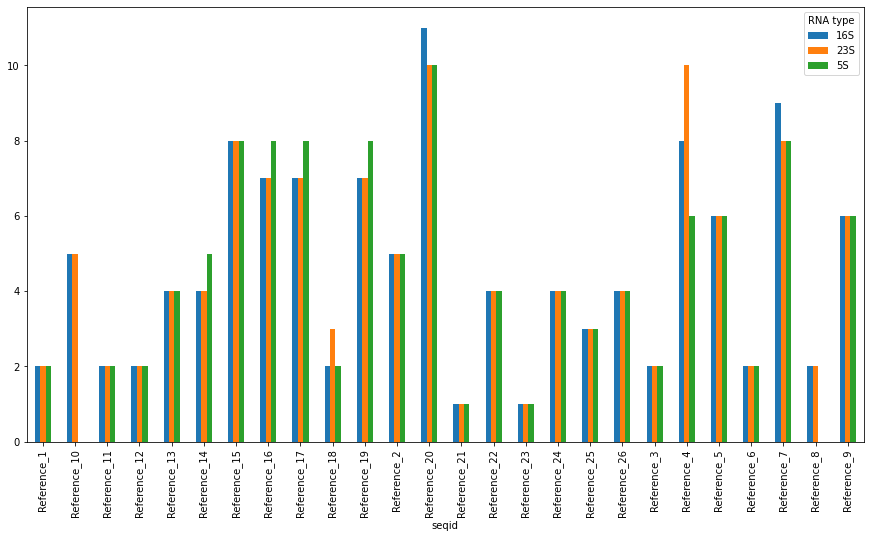

In [20]:
def read_gff(file_path):
    gff = pd.read_csv(file_path, sep='\t', comment='t',
                     names=['seqid', 'resourse', 'type', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])
    gff.drop(index = gff[gff['seqid'].str.contains('#')].index, inplace=True)
    gff.reset_index(inplace=True)
    gff['attribute'] = gff['attribute'].astype(str).apply(lambda x: x.split('_')[0].split('=')[1])
    return gff


def read_bed6(file_path):
    bed6 = pd.read_csv(file_path, sep='\t',  names = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand'])
    return bed6


def rna_count(file_path):
    gff = read_gff(file_path)
    rnas_count = gff.groupby(['seqid','attribute']).size().to_frame().reset_index()
    rnas_count = rnas_count.rename(columns={0:'quantity', 'attribute':'RNA type'})
    return rnas_count


gff_file = rna_count('rrna_annotation.gff')
gff_file.pivot(index='seqid', columns='RNA type', values='quantity').plot.bar(figsize=(15,8))
#print(gff_file)
#print(read_bed6('alignment.bed'))


# Graphics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
diffexpr_data = pd.read_csv('diffexpr_data.tsv.gz', header=0, sep='\t', quotechar='"')
#print(diffexpr_data)
data_for_volcano = diffexpr_data[['logFC','log_pval']]

s_down = data_for_volcano.query('`logFC`<0 and `log_pval`>0.5')
s_up = data_for_volcano.query('`logFC`>0 and `log_pval`>0.5')
ns_down = data_for_volcano.query('`logFC`<0 and `log_pval`<0.5')
ns_up = data_for_volcano.query('`logFC`>0 and `log_pval`<0.5')

#print(data_for_volcano)

plt.scatter(s_down['logFC'],s_down['log_pval'], color = 'steelblue', s=5, label='Significantly downregulated')
plt.scatter(s_up['logFC'],s_up['log_pval'], color = 'orange', s=5, label='Significantly upregulated')
plt.scatter(ns_down['logFC'],ns_down['log_pval'], color = 'yellowgreen', s=5, label='Non-significantly downregulated')
plt.scatter(ns_up['logFC'],ns_up['log_pval'], color = 'crimson', s=5, label='Non-significantly upregulated')

plt.hlines(0.5, -10, 10, linestyle="--", alpha=0.6)
plt.vlines(0, -0.1, 1.1, linestyle="--", alpha=0.6)

plt.legend(title='')

plt.xlabel("log(fold change)")
plt.ylabel("-log (p-value corrected)")
plt.title("Volcano plot")

plt.yticks([0,10,20, 40, 60, 80, 100])


FileNotFoundError: ignored

In [18]:
diffexpr_data = pd.read_csv('diffexpr_data.tsv.gz', header=0, sep='\t', quotechar='"')
#print(diffexpr_data)
data_for_volcano = diffexpr_data[['logFC','log_pval']]

s_down = data_for_volcano.query('`logFC`<0 and `log_pval`>0.5')
s_up = data_for_volcano.query('`logFC`>0 and `log_pval`>0.5')
ns_down = data_for_volcano.query('`logFC`<0 and `log_pval`<0.5')
ns_up = data_for_volcano.query('`logFC`>0 and `log_pval`<0.5')

#print(data_for_volcano)

plt.scatter(s_down['logFC'],s_down['log_pval'], color = 'steelblue', s=5, label='Significantly downregulated')
plt.scatter(s_up['logFC'],s_up['log_pval'], color = 'orange', s=5, label='Significantly upregulated')
plt.scatter(ns_down['logFC'],ns_down['log_pval'], color = 'yellowgreen', s=5, label='Non-significantly downregulated')
plt.scatter(ns_up['logFC'],ns_up['log_pval'], color = 'crimson', s=5, label='Non-significantly upregulated')

plt.hlines(0.5, -10, 10, linestyle="--", alpha=0.6)
plt.vlines(0, -0.1, 1.1, linestyle="--", alpha=0.6)

plt.legend(title='')

plt.xlabel("log(fold change)")
plt.ylabel("-log (p-value corrected)")
plt.title("Volcano plot")


FileNotFoundError: ignored